In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<AxesSubplot:>

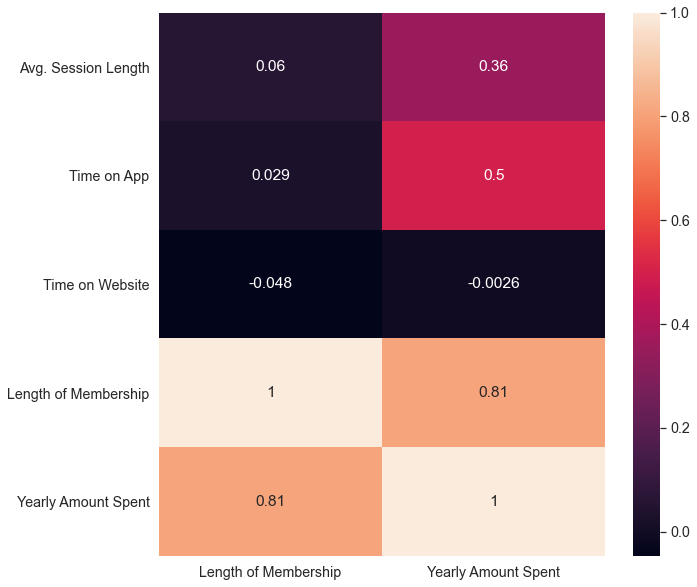

In [5]:
sns.heatmap(df.corr()[['Length of Membership', 'Yearly Amount Spent']], annot=True)

In [6]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [7]:
def extract (data):
    return data.split('@')[1]
df['E_provider'] = df['Email'].apply(extract)

In [8]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
E_provider              0
dtype: int64

In [9]:
df['Avatar'].describe()
x = list(df['Avatar'].unique())
len(x)

138

In [10]:
dic = {}
Avatar1 = list(df['Avatar'].unique())
x = list(range(len(Avatar1)))
for col in Avatar1 :
    for i in x :
        dic[col] = i 
        x.remove(i)
        break
        
df['Avatar'] = df['Avatar'].map(dic)

In [11]:
df.drop(['Email','Address'], axis= 1 ,inplace = True )

In [12]:
numerical = ['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']
categorical = ['E_provider',]

In [13]:
from datasist.structdata import detect_outliers
for col in numerical:
    out = detect_outliers(df,0,[col])
    df[col].iloc[out] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [14]:
df.iloc[out]

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,E_provider
50,45,33.256335,13.858062,37.780265,NaN,NaN,gmail.com
65,15,34.374258,NaN,37.157624,5.377594,NaN,diaz.org
157,22,34.603311,12.207298,NaN,NaN,NaN,yahoo.com
205,33,34.967610,13.919494,37.952013,5.066697,NaN,mcdonald-williams.com
225,100,32.836941,10.256549,36.143908,NaN,NaN,summers-davis.com
299,74,30.492537,11.562936,35.976565,1.481617,NaN,hotmail.com
303,37,30.816201,11.851399,36.925043,NaN,NaN,richardson.com
368,111,34.385820,12.729720,36.232110,5.705941,NaN,gmail.com
415,3,31.517122,10.745189,38.791235,1.428824,NaN,cook.info


In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df[numerical] = imputer.fit_transform(df[numerical])

In [16]:
df = pd.get_dummies(df, columns= categorical , drop_first= True)
df

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,E_provider_alvarez-cline.info,E_provider_anderson-avery.com,E_provider_anderson.com,E_provider_anderson.org,...,E_provider_white.com,E_provider_wiley.com,E_provider_williams.com,E_provider_williamson-boyd.org,E_provider_wilson-horne.com,E_provider_wilson.com,E_provider_wright.com,E_provider_yahoo.com,E_provider_yoder.org,E_provider_zimmerman-villegas.com
0,0,34.497268,12.655651,39.577668,4.082621,587.951054,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,31.926272,11.109461,37.268959,2.664034,392.204933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,33.000915,11.330278,37.110597,4.104543,487.547505,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,34.305557,13.717514,36.721283,3.120179,581.852344,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,33.330673,12.795189,37.536653,4.446308,599.406092,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,108,33.237660,13.566160,36.417985,3.746573,573.847438,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,129,34.702529,11.695736,37.190268,3.576526,529.049004,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,65,32.646777,11.499409,38.332576,4.958264,551.620145,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,23,33.322501,12.391423,36.840086,2.336485,456.469510,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x = df.drop('Yearly Amount Spent', axis = 1 )
y = df['Yearly Amount Spent']

In [18]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 248)
(100, 248)
(400,)
(100,)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [22]:
model = {'LinearRegression': LinearRegression() ,
         'KNeighborsRegressor': KNeighborsRegressor() ,
         'SVR': SVR() ,
         'DecisionTreeRegressor': DecisionTreeRegressor() ,
         'RandomForestRegressor': RandomForestRegressor() ,
         'XGBRFRegressor': XGBRegressor() 
         }

In [23]:
for name , item in model.items():
    print(f'----- Name : -- {name} -- ')
    item.fit(x_train,y_train)
    print(f'Train Score: {item.score(x_train, y_train)}')
    print(f'Test Score: {item.score(x_test, y_test)}')
    y_pred = item.predict(x_test)
    print(f'MSEP: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print('--- --- --- --- --- --- --- --- --- ---')

----- Name : -- LinearRegression -- 
Train Score: 0.9220525369659018
Test Score: -5.169364243894999e+26
MSEP: 1657643453574706.8
--- --- --- --- --- --- --- --- --- ---
----- Name : -- KNeighborsRegressor -- 
Train Score: 0.7982195142851006
Test Score: 0.6630425925517928
MSEP: 42.321403293607766
--- --- --- --- --- --- --- --- --- ---
----- Name : -- SVR -- 
Train Score: 0.03627352481363921
Test Score: 0.03628098095755561
MSEP: 71.57276093233423
--- --- --- --- --- --- --- --- --- ---
----- Name : -- DecisionTreeRegressor -- 
Train Score: 1.0
Test Score: 0.6217608061684837
MSEP: 44.83898986153355
--- --- --- --- --- --- --- --- --- ---
----- Name : -- RandomForestRegressor -- 
Train Score: 0.9773750628952912
Test Score: 0.7909311009598348
MSEP: 33.33629047668414
--- --- --- --- --- --- --- --- --- ---
----- Name : -- XGBRFRegressor -- 
Train Score: 0.9994798489510349
Test Score: 0.7595950773067557
MSEP: 35.74738138191802
--- --- --- --- --- --- --- --- --- ---


In [24]:
models = XGBRegressor()
models.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
y_pred = models.predict(x_test)
y_pred

array([556.6296 , 507.92395, 512.7727 , 445.03262, 564.29584, 557.2135 ,
       489.86267, 477.3394 , 499.2111 , 463.9813 , 454.48352, 409.87247,
       561.11035, 527.97614, 410.9864 , 539.8182 , 485.98444, 556.74316,
       505.84958, 523.6267 , 601.35846, 440.63278, 492.63626, 503.98846,
       539.2454 , 423.34317, 491.69547, 644.787  , 522.4799 , 447.21277,
       457.2017 , 559.4114 , 570.7459 , 525.296  , 512.39966, 459.48172,
       376.43533, 506.47284, 606.8904 , 524.1745 , 565.57153, 420.51816,
       609.80005, 587.84955, 619.79913, 559.52466, 449.5769 , 357.0423 ,
       441.07672, 523.9576 , 492.2899 , 472.4498 , 516.7588 , 405.3009 ,
       474.9346 , 405.64597, 435.2618 , 572.9669 , 514.5536 , 477.6938 ,
       574.10046, 481.43704, 538.79004, 533.77795, 413.36642, 515.4214 ,
       574.29956, 553.8694 , 480.1447 , 401.26132, 398.63425, 420.85687,
       415.21274, 427.3333 , 592.48334, 377.39334, 414.286  , 440.1111 ,
       469.03906, 398.69455, 388.21704, 537.58813, 

In [26]:
y_test

281    560.443792
168    506.536393
426    530.766719
434    304.135592
343    576.025244
          ...    
390    546.556667
66     553.601535
102    420.737673
56     520.898794
371    447.369027
Name: Yearly Amount Spent, Length: 100, dtype: float64

In [27]:
mean_squared_error(y_test, y_pred)

1277.875275664299

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))

35.74738138191802

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7595950773067557